In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils import show_graph, show_multiple_graph, plot_JRX, show_graph_cluster_color, show_colors_multiple_graph
from generator import generate, generate_and_give_tau

from EM_torch import mixtureModel

Fit finished for  2  clusters 
Fit finished for  3  clusters 
Fit finished for  4  clusters 
Fit finished for  5  clusters 


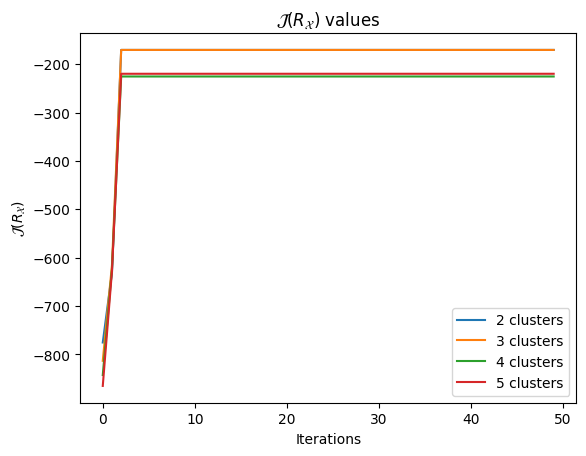

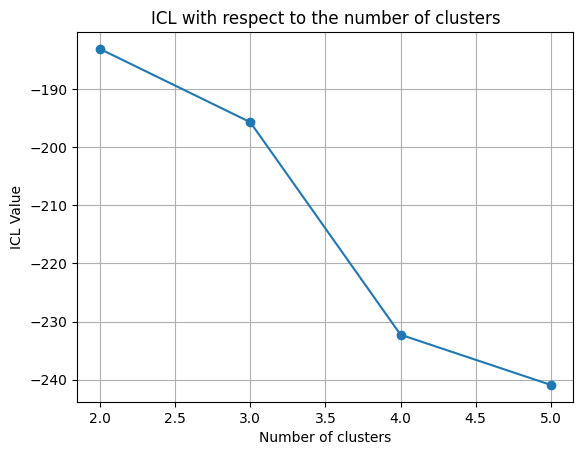

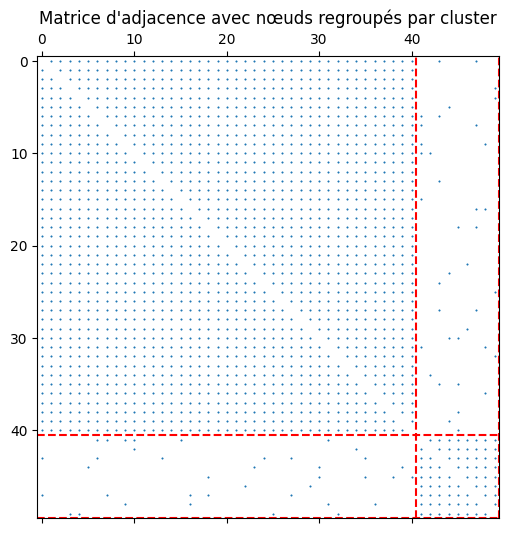

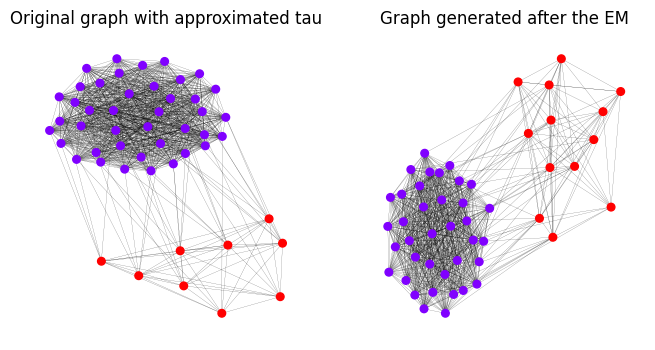

In [3]:
np.random.seed(2)
n_vertices = 50
pi = np.array([[1,0.1],[0.1,1]])
priors = np.array([0.2,0.8])
true_n_clusters = len(priors)
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

model = mixtureModel(graph, initilisation_method='random')
tab_clusters = [2,3,4,5]
model.fit(tab_clusters)

model.plot_jrx()
model.plot_icl()
model.plot_adjency_matrix(true_n_clusters)

new_graph, new_tau = generate_and_give_tau(n_vertices, model.results[true_n_clusters]['pi'] , model.results[true_n_clusters]['priors'])
show_colors_multiple_graph([graph, new_graph],[model.results[true_n_clusters]['tau'], new_tau], ['Original graph with approximated tau', 'Graph generated after the EM'])

In this first example, the algorithm works when the tau are estimated with the true ones, but it fails to converge when the tau used to initialize the values are not the good ones

Fit finished for  2  clusters 
Fit finished for  3  clusters 
Fit finished for  4  clusters 
Fit finished for  5  clusters 


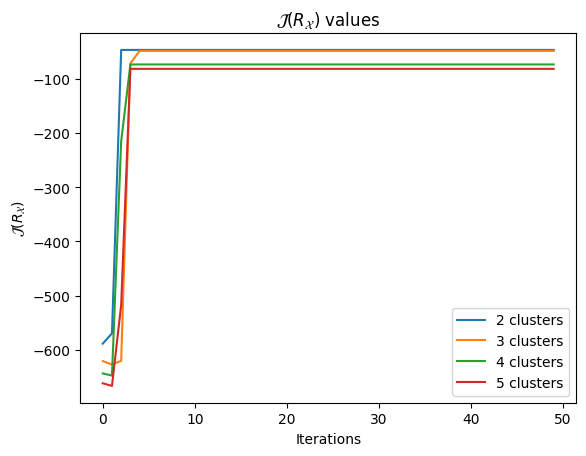

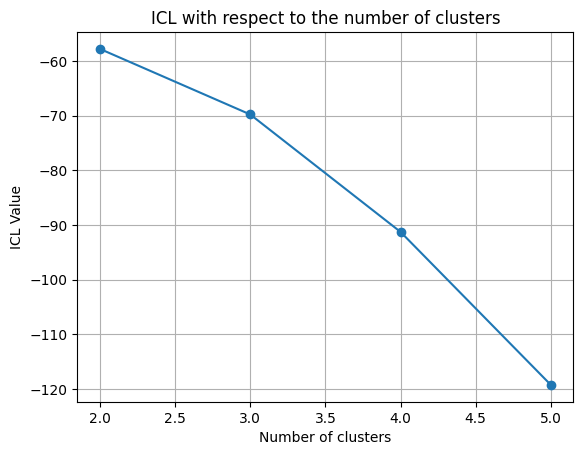

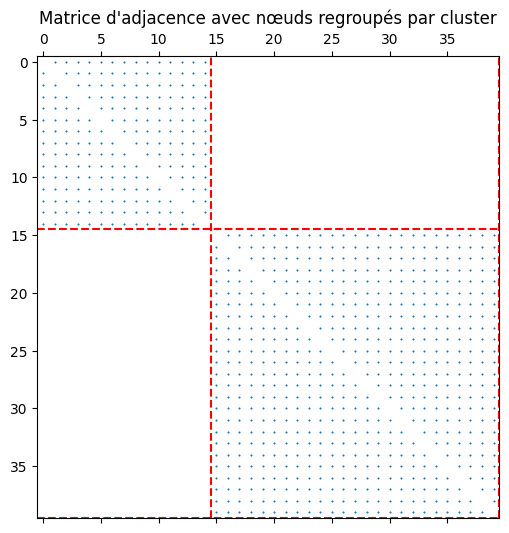

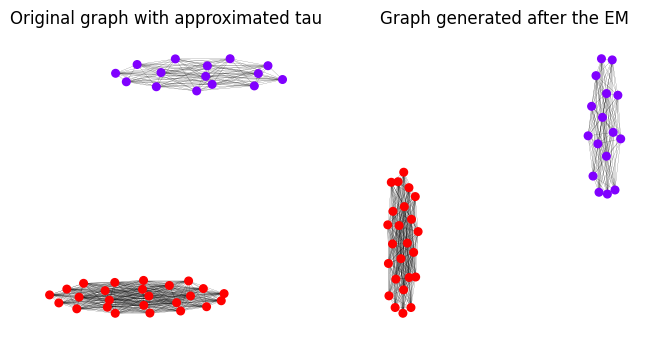

In [12]:
np.random.seed(2)
n_vertices = 40
pi = np.array([[1,0],[0,1]])
priors = np.array([0.5,0.5])
true_n_clusters = len(priors)
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

model = mixtureModel(graph, initilisation_method='random')
tab_clusters = [2,3,4,5]
model.fit(tab_clusters)

model.plot_jrx()
model.plot_icl()
model.plot_adjency_matrix(true_n_clusters)

new_graph, new_tau = generate_and_give_tau(n_vertices, model.results[true_n_clusters]['pi'] , model.results[true_n_clusters]['priors'])
show_colors_multiple_graph([graph, new_graph],[model.results[true_n_clusters]['tau'], new_tau], ['Original graph with approximated tau', 'Graph generated after the EM'])

Fit finished for  2  clusters 
Fit finished for  3  clusters 
Fit finished for  4  clusters 
Fit finished for  5  clusters 


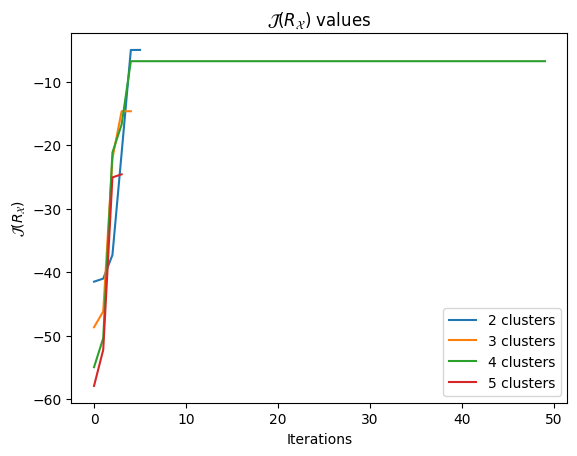

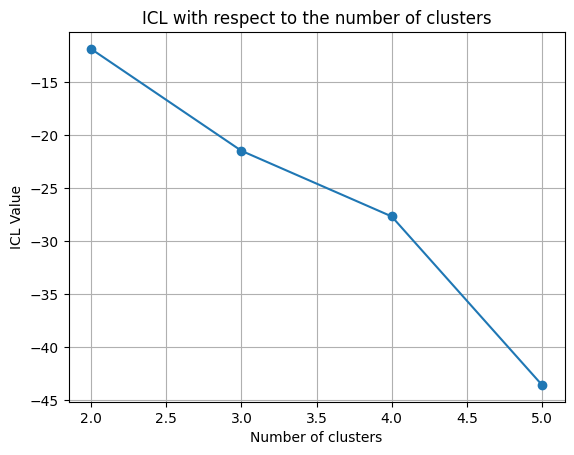

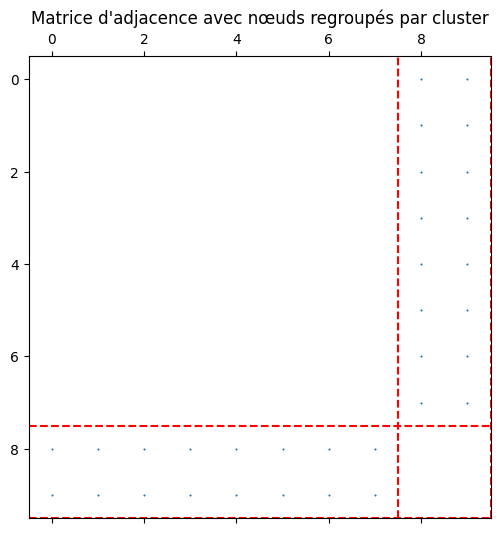

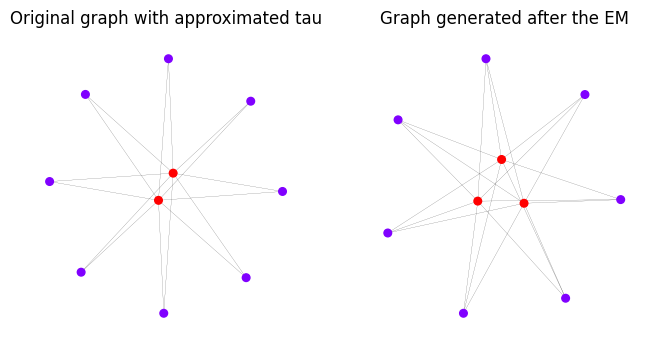

In [6]:
np.random.seed(1)
n_vertices = 10
pi = np.array([[0,1],[1,0]])
priors = np.array([0.1,0.9])
true_n_clusters = len(priors)
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

model = mixtureModel(graph, initilisation_method='random')
tab_clusters = [2,3,4,5]
model.fit(tab_clusters)

model.plot_jrx()
model.plot_icl()
model.plot_adjency_matrix(true_n_clusters)

new_graph, new_tau = generate_and_give_tau(n_vertices, model.results[true_n_clusters]['pi'] , model.results[true_n_clusters]['priors'])
show_colors_multiple_graph([graph, new_graph],[model.results[true_n_clusters]['tau'], new_tau], ['Original graph with approximated tau', 'Graph generated after the EM'])


Fit finished for  2  clusters 
Fit finished for  3  clusters 
Fit finished for  4  clusters 
Fit finished for  5  clusters 


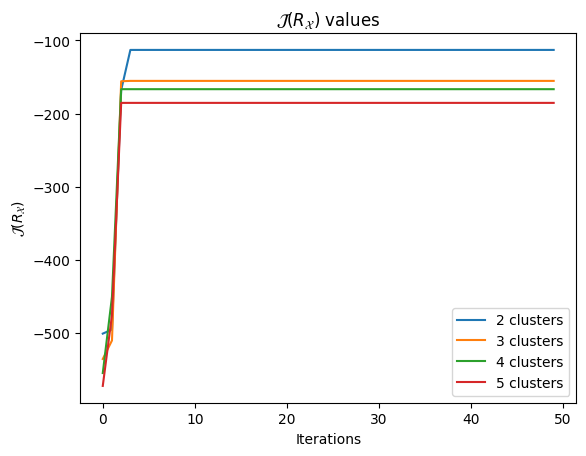

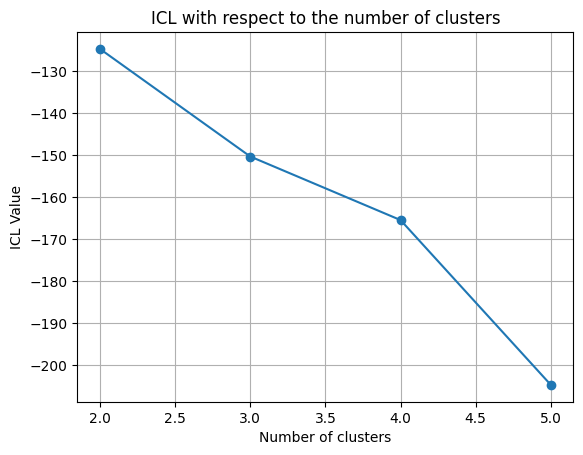

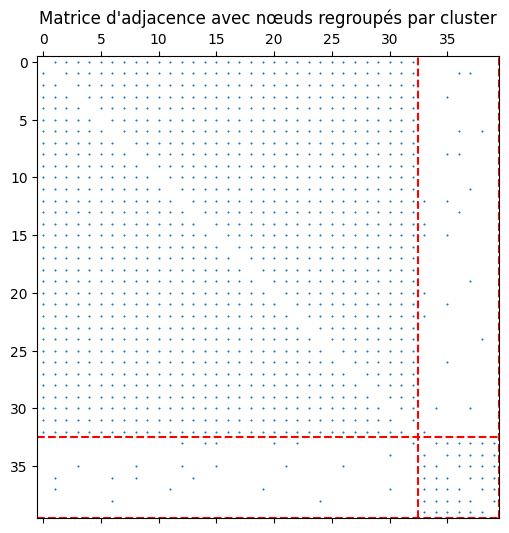

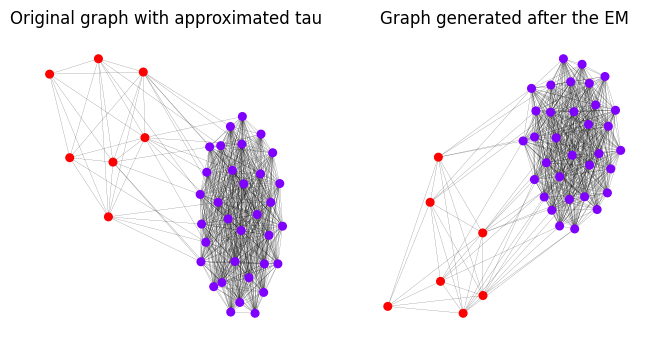

In [13]:
n_vertices = 40
pi = np.array([[1,0.1],[0.1,1]])
priors = np.array([0.2,0.8])
true_n_clusters = len(priors)
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

model = mixtureModel(graph, initilisation_method='random')
tab_clusters = [2,3,4,5]
model.fit(tab_clusters)

model.plot_jrx()
model.plot_icl()
model.plot_adjency_matrix(true_n_clusters)

new_graph, new_tau = generate_and_give_tau(n_vertices, model.results[true_n_clusters]['pi'] , model.results[true_n_clusters]['priors'])
show_colors_multiple_graph([graph, new_graph],[model.results[true_n_clusters]['tau'], new_tau], ['Original graph with approximated tau', 'Graph generated after the EM'])


Fit finished for  2  clusters 
Fit finished for  3  clusters 
Fit finished for  4  clusters 
Fit finished for  5  clusters 


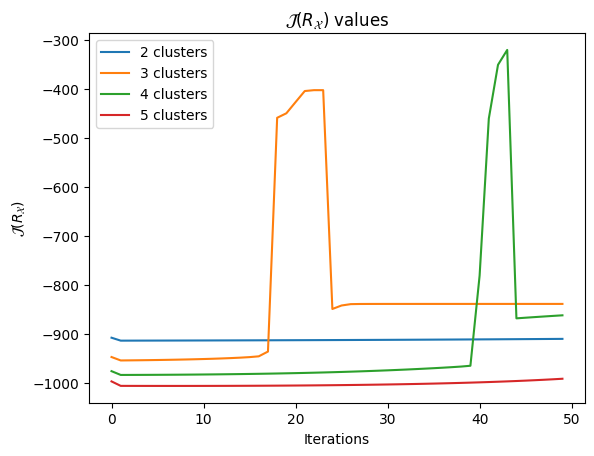

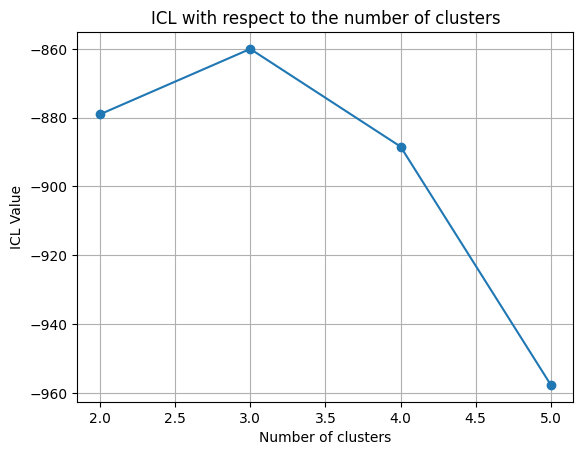

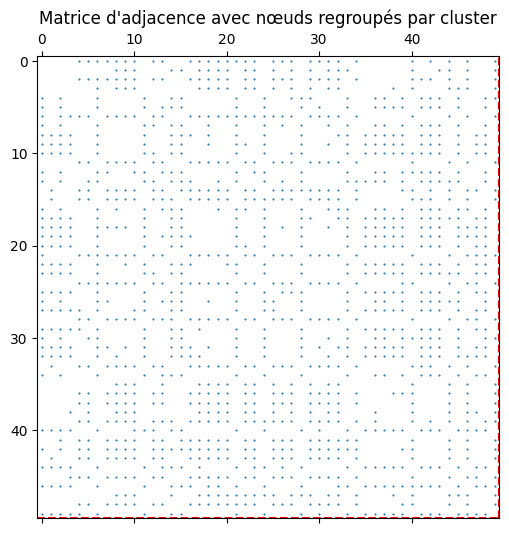

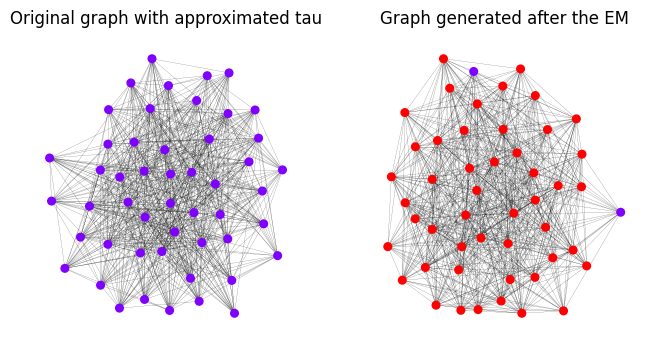

In [8]:
n_vertices = 50
pi = np.array([[0.1,1,0.1,0.1],[1,0.1,1,0.1],[0.1,1,0.1,1],[0.1,0.1,1,0.1]])
priors = np.array([0.1, 0.4, 0.4, 0.1])
true_n_clusters = len(priors)
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

model = mixtureModel(graph, initilisation_method='random')
tab_clusters = [2,3,4,5]
model.fit(tab_clusters)

model.plot_jrx()
model.plot_icl()
model.plot_adjency_matrix(true_n_clusters)

new_graph, new_tau = generate_and_give_tau(n_vertices, model.results[true_n_clusters]['pi'] , model.results[true_n_clusters]['priors'])
show_colors_multiple_graph([graph, new_graph],[model.results[true_n_clusters]['tau'], new_tau], ['Original graph with approximated tau', 'Graph generated after the EM'])


Fit finished for  2  clusters 
Fit finished for  3  clusters 
Fit finished for  4  clusters 
Fit finished for  5  clusters 


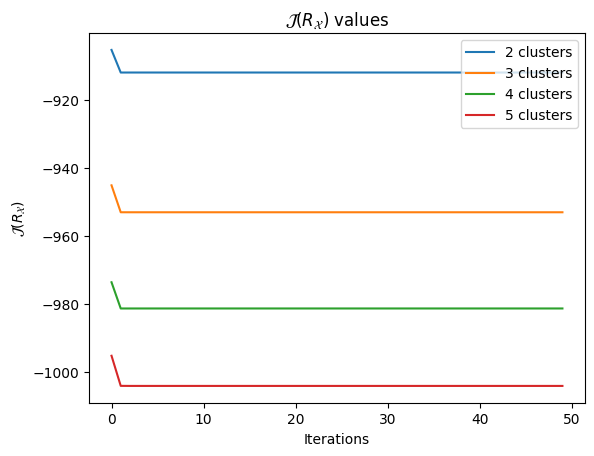

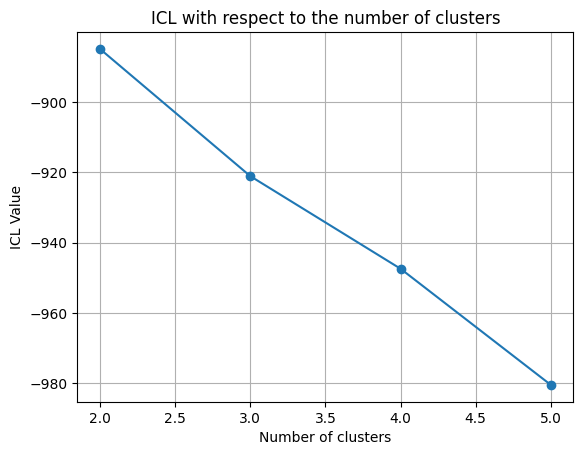

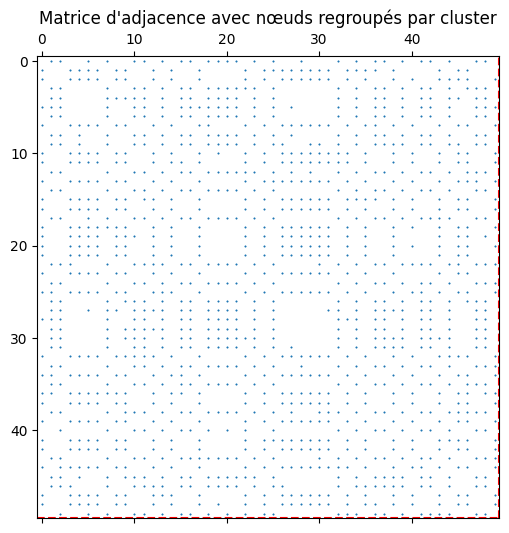

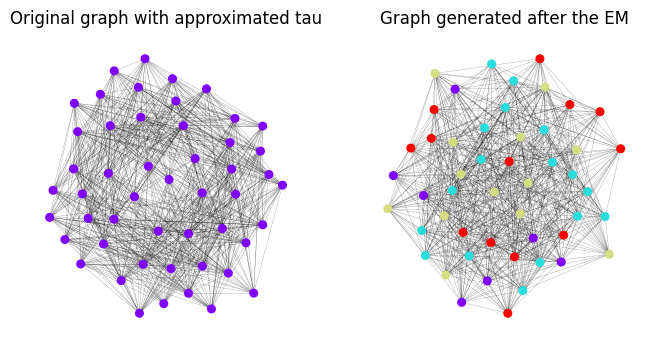

In [9]:
np.random.seed(2)
n_vertices = 50
pi = np.array([[0.1,1,0.1,0.1],[1,0.1,1,0.1],[0.1,1,0.1,1],[0.1,0.1,1,0.1]])
priors = np.array([0.1, 0.4, 0.4, 0.1])
true_n_clusters = len(priors)
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

model = mixtureModel(graph, initilisation_method='random')
tab_clusters = [2,3,4,5]
model.fit(tab_clusters)

model.plot_jrx()
model.plot_icl()
model.plot_adjency_matrix(true_n_clusters)

new_graph, new_tau = generate_and_give_tau(n_vertices, model.results[true_n_clusters]['pi'] , model.results[true_n_clusters]['priors'])
show_colors_multiple_graph([graph, new_graph],[model.results[true_n_clusters]['tau'], new_tau], ['Original graph with approximated tau', 'Graph generated after the EM'])

Fit finished for  2  clusters 
Fit finished for  3  clusters 
Fit finished for  4  clusters 
Fit finished for  5  clusters 


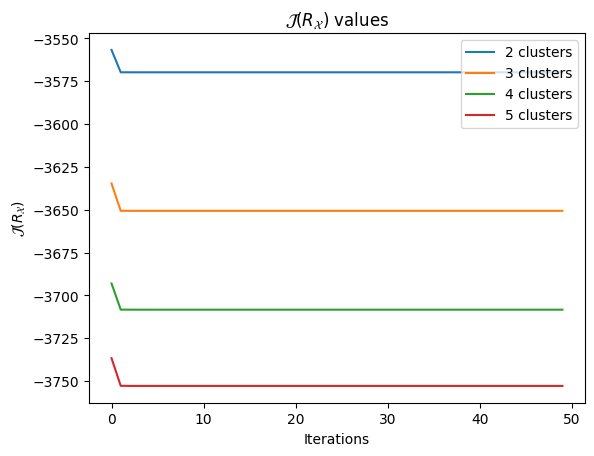

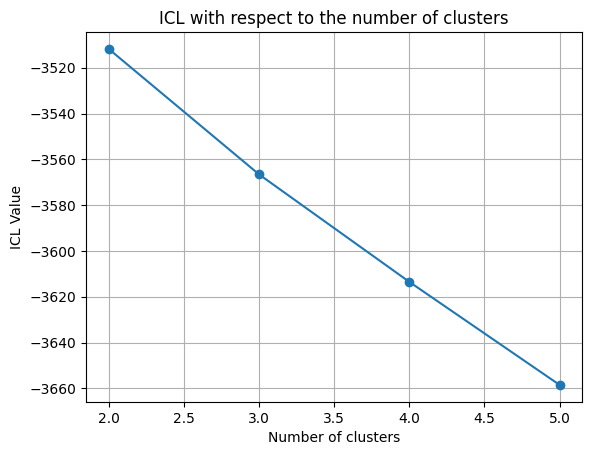

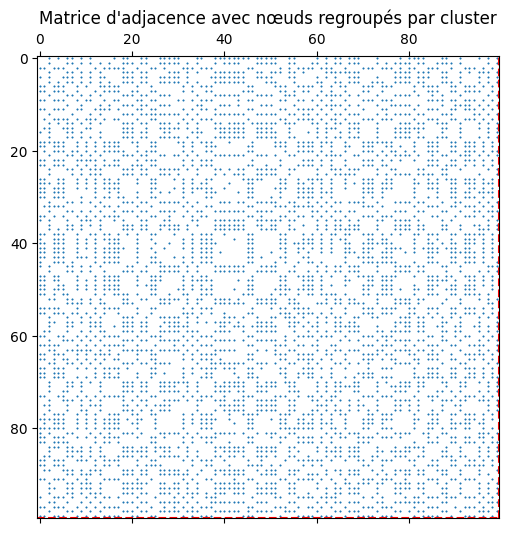

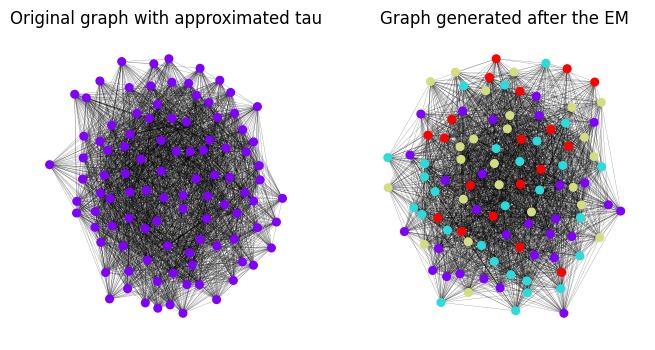

In [10]:
np.random.seed(3)
n_vertices = 100
pi = np.array([[0.1,0.9,0.1,0.1],[0.9,0.1,0.9,0.1],[0.1,0.9,0.1,0.9],[0.1,0.1,0.9,0.1]])
priors = np.array([0.1, 0.4, 0.4, 0.1])
true_n_clusters = len(priors)
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

model = mixtureModel(graph, initilisation_method='random')
tab_clusters = [2,3,4,5]
model.fit(tab_clusters)

model.plot_jrx()
model.plot_icl()
model.plot_adjency_matrix(true_n_clusters)

new_graph, new_tau = generate_and_give_tau(n_vertices, model.results[true_n_clusters]['pi'] , model.results[true_n_clusters]['priors'])
show_colors_multiple_graph([graph, new_graph],[model.results[true_n_clusters]['tau'], new_tau], ['Original graph with approximated tau', 'Graph generated after the EM'])

Fit finished for  2  clusters 
Fit finished for  3  clusters 
Fit finished for  4  clusters 
Fit finished for  5  clusters 


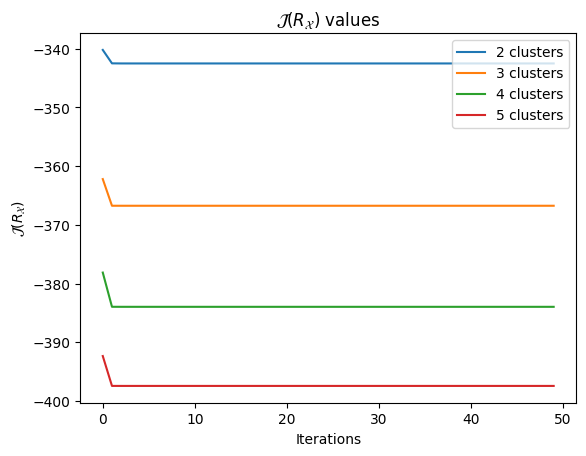

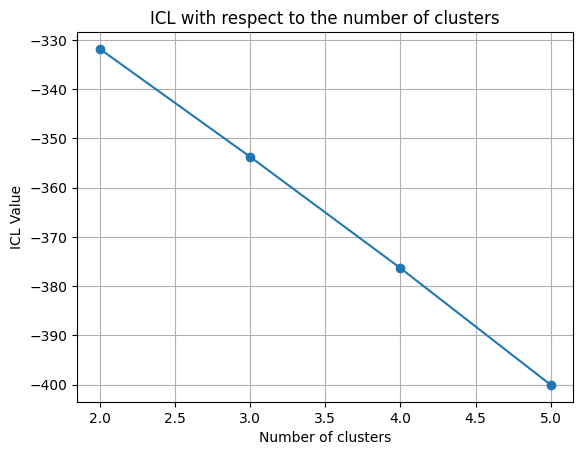

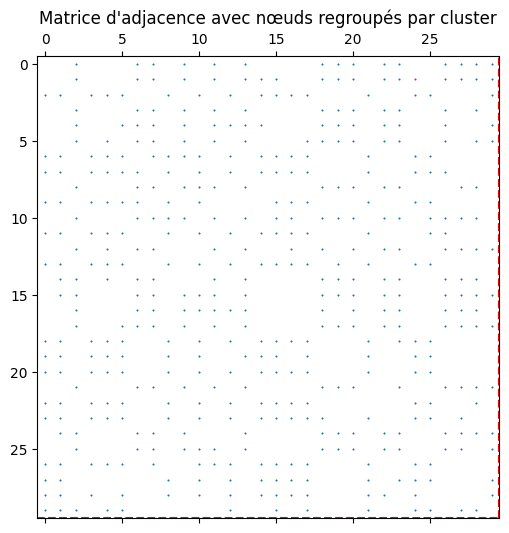

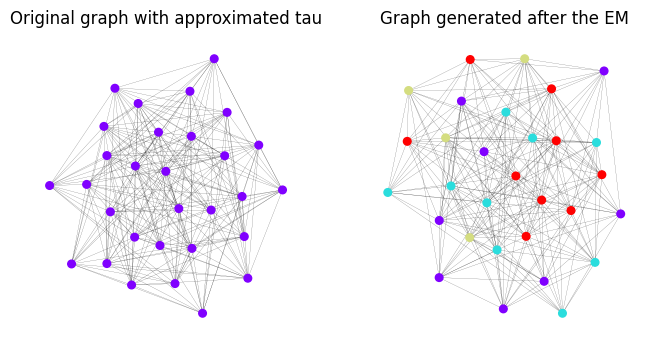

In [11]:
np.random.seed(3)
n_vertices = 30
pi = np.array([[0.1,0.9,0.1,0.1],[0.9,0.1,0.9,0.1],[0.1,0.9,0.1,0.9],[0.1,0.1,0.9,0.1]])
priors = np.array([0.1, 0.4, 0.4, 0.1])
true_n_clusters = len(priors)
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

model = mixtureModel(graph, initilisation_method='random')
tab_clusters = [2,3,4,5]
model.fit(tab_clusters)

model.plot_jrx()
model.plot_icl()
model.plot_adjency_matrix(true_n_clusters)

new_graph, new_tau = generate_and_give_tau(n_vertices, model.results[true_n_clusters]['pi'] , model.results[true_n_clusters]['priors'])
show_colors_multiple_graph([graph, new_graph],[model.results[true_n_clusters]['tau'], new_tau], ['Original graph with approximated tau', 'Graph generated after the EM'])

In [7]:
print(np.mean(tau, axis = 0))

[0.1    0.4667 0.4    0.0333]


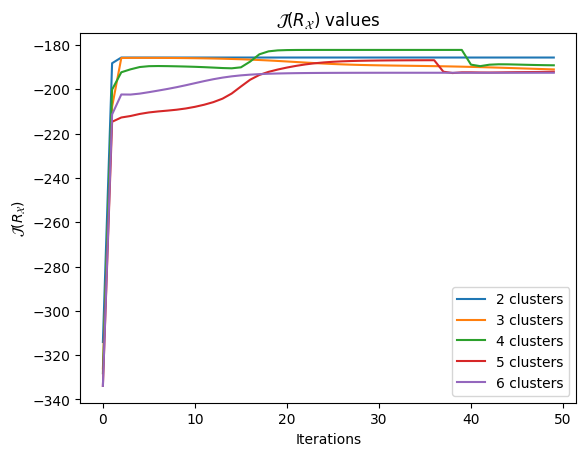

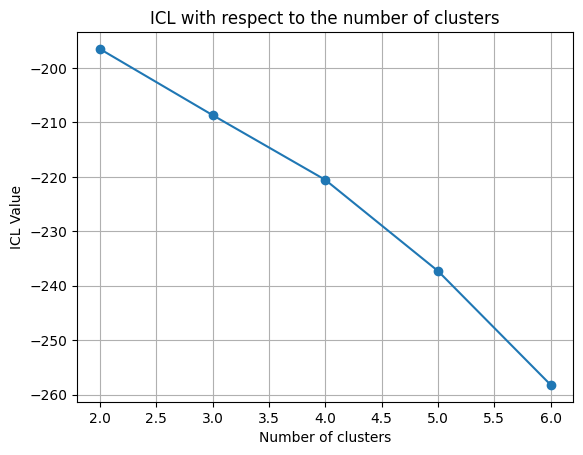

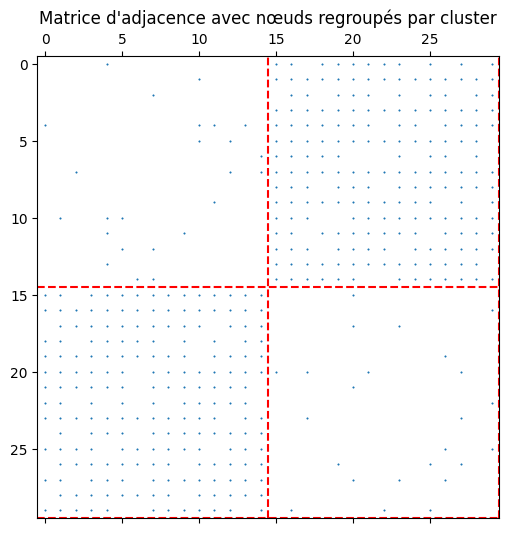

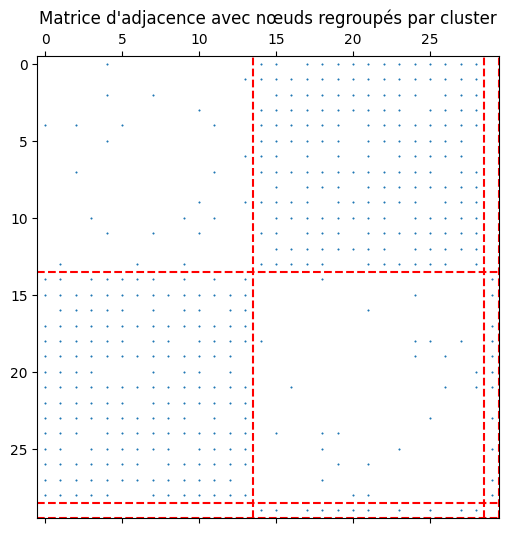

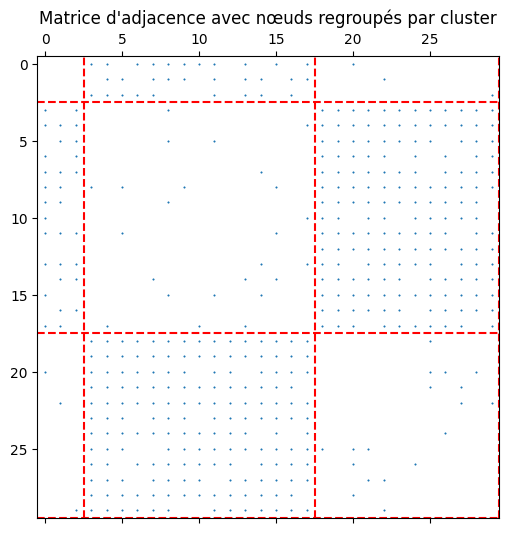

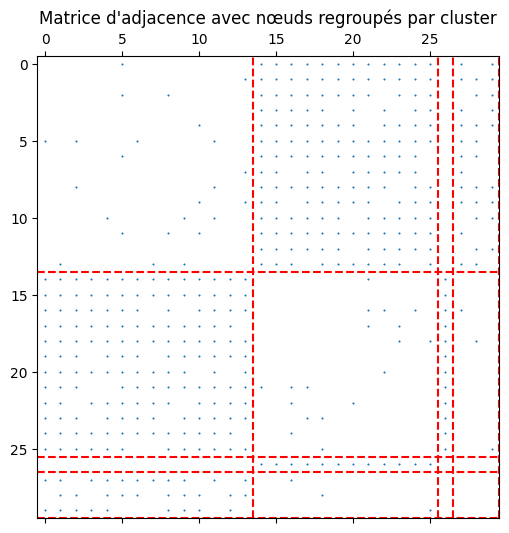

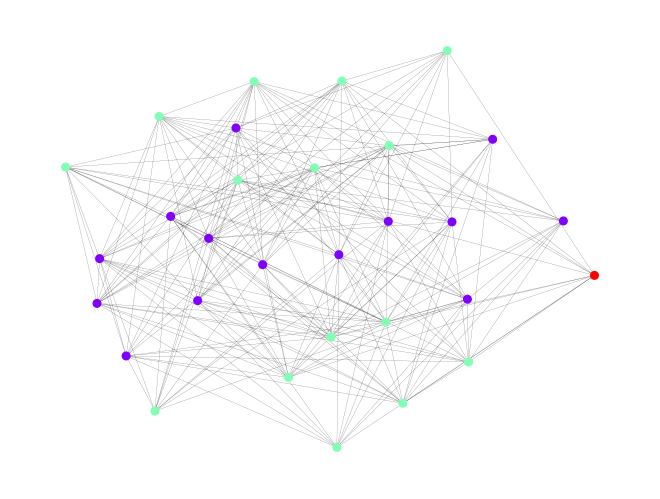

In [8]:
model2 = mixtureModel(graph, initilisation_method='spectral')
tab_clusters = [2,3,4,5,6]
model2.fit(tab_clusters)

model2.plot_jrx()
model2.plot_icl()
model2.plot_adjency_matrix(2)
model2.plot_adjency_matrix(3)
model2.plot_adjency_matrix(4)
model2.plot_adjency_matrix(5)

show_graph_cluster_color(graph, model2.results[3]['tau'])